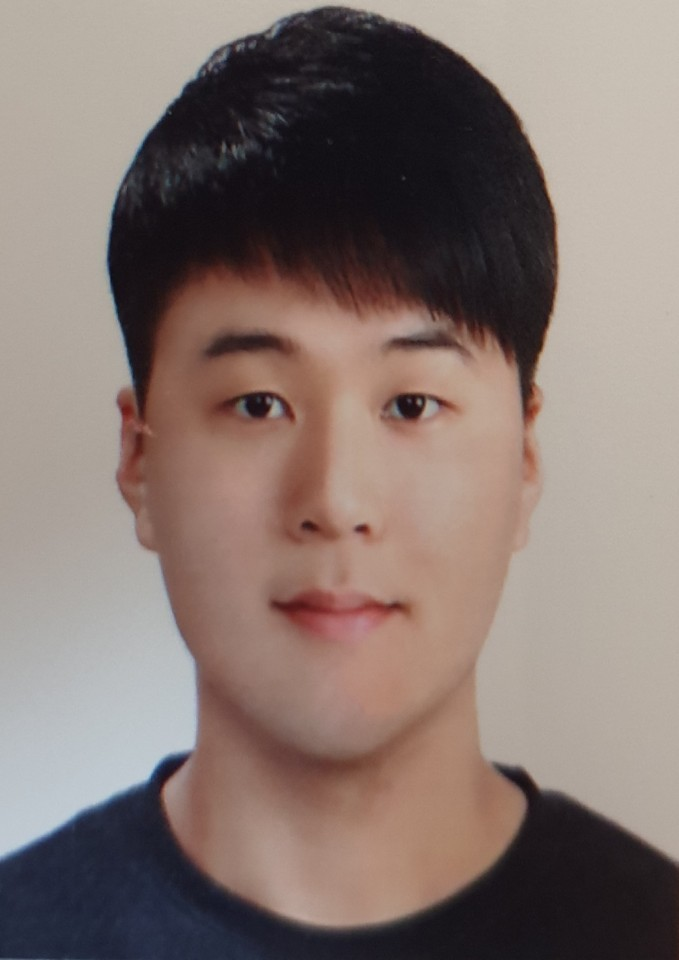

In [207]:
from PIL.Image import open as imopen
imopen('C:/Users/Affinity/Documents/카카오톡 받은 파일/KakaoTalk_20190723_101856055.jpg')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# adjust 한글 font
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# $\text{Data Load}$

In [3]:
df = pd.read_excel('default_of_credit_card_clients.xlsx')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# $\text{Contraint}$
- seed # : 20190730
- stratified sampling

## 교수님 제안
- CNN도 써봐라!
- convolution을 열로만 움직여서~
- kernel=(1,3)
- DCGAN image 키우는 작업 > fractional stride, alphafold
- 분류되어질 확률을 return하는 알고리즘을 사용하면 더 좋음 ㅎㅎ
- SMOTE, sklearn에서 distance metric 선정 잘하기

# $\text{Purpose}$

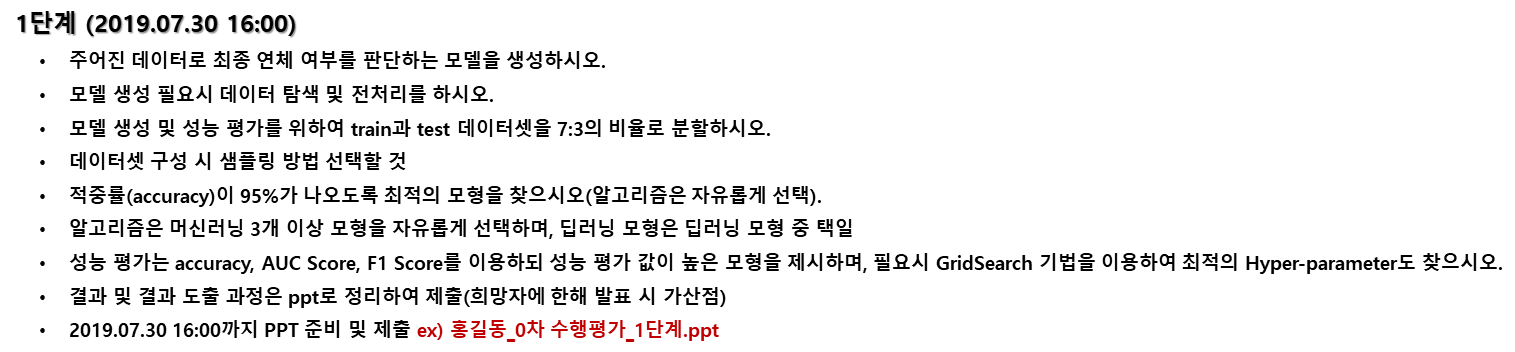

# 본 문서에서는
- 

# $\text{Baseline}$
- logistic regression
- Gaussian naive bayesian
- randomforest
- xgboost
- light gbm

- dnn

In [6]:
# tensor graph 초기화
import tensorflow as tf
tf.reset_default_graph()

import keras.backend as K
K.clear_session()

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from keras.models import Sequential
from keras.layers import Dense

def DNNClassifier():
    model = Sequential()
    model.add(Dense(32, input_shape=(23,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

log_clf = LogisticRegression()
gnb_clf = GaussianNB()
knn_clf = KNeighborsClassifier(n_neighbors=144)
rf_clf = RandomForestClassifier(n_estimators=100)
xgb_clf = XGBClassifier(n_estimators=100)
lgb_clf = LGBMClassifier(n_estimators=100)
dnn_clf = DNNClassifier()

In [7]:
# 학습을 위해 feature sets / target set으로 분리
X = df[df.columns[1:-1]]
y = df[df.columns[-1]]

# # train / test를 7:3으로 분리
# X_train = X[:int(len(X) * 0.7)]
# y_train = y[:int(len(X) * 0.7)]
# X_test = X[int(len(X) * 0.7):]
# y_test = y[int(len(X) * 0.7):]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, random_state=20190730,
                                                    stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21000, 23), (21000,), (9000, 23), (9000,))

In [8]:
y_train.value_counts() / len(y_train)

0    0.77881
1    0.22119
Name: default payment next month, dtype: float64

In [9]:
y_test.value_counts() / len(y_test)

0    0.778778
1    0.221222
Name: default payment next month, dtype: float64

In [10]:
# Standard normalization 기법으로 feature scale 조정
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)

X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

In [11]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4577,0.397514,0.808159,-1.080145,-1.050124,-0.061813,-0.873703,-0.717567,-0.688910,-0.659224,-0.640813,...,-0.678823,-0.659019,-0.648863,-0.637943,-0.310602,-0.286793,-0.243667,-0.278605,-0.295819,-0.245904
28965,1.089633,0.808159,0.184732,0.860515,0.046054,0.019306,0.120992,0.147339,0.199886,0.242777,...,3.222702,3.210466,3.007262,3.172560,0.293560,0.188036,0.192821,0.205199,0.287234,0.194086
1128,-0.063899,0.808159,-1.080145,0.860515,-0.709011,0.912315,-1.556127,-1.525158,-1.518335,-1.524402,...,-0.678766,-0.665024,-0.655286,-0.644482,-0.340810,-0.286793,-0.286696,-0.303738,-0.322654,-0.290426
10944,2.550774,0.808159,-1.080145,0.860515,0.585386,1.805324,1.798111,-1.525158,-1.518335,-1.524402,...,-0.678766,-0.665024,-0.655286,-0.644482,-0.340810,-0.286793,-0.286696,-0.303738,-0.322654,-0.290426
7943,-1.063627,0.808159,0.184732,-1.050124,1.016852,0.019306,0.120992,0.147339,0.199886,0.242777,...,-0.483960,-0.453915,-0.427080,-0.407532,-0.239553,-0.226752,-0.259911,-0.271631,-0.287823,-0.260520


In [12]:
X_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4489,-0.294606,-1.237321,1.449610,0.860515,-0.924744,0.019306,0.120992,0.147339,0.199886,0.242777,...,0.240633,0.343551,0.446135,0.404538,-0.200826,-0.139514,-0.123706,-0.115243,0.016172,-0.160852
16827,-0.140801,-1.237321,-1.080145,-1.050124,0.801119,-1.766712,-1.556127,-1.525158,-1.518335,-0.640813,...,-0.678766,-0.641709,-0.573962,-0.627969,-0.340810,-0.286793,-0.204006,0.011300,-0.227376,-0.290426
10338,0.243710,-1.237321,-1.080145,0.860515,-0.385412,0.912315,1.798111,1.819836,1.918108,2.009955,...,-0.378317,-0.355324,-0.283928,-0.274608,-0.340810,-0.139514,-0.286696,-0.115243,-0.322654,-0.121783
19939,0.474416,0.808159,-1.080145,-1.050124,0.693253,-0.873703,-0.717567,-0.688910,-0.659224,-1.524402,...,-0.611216,-0.635535,-0.617219,-0.644482,-0.339904,-0.056055,-0.182111,-0.156272,-0.322654,-0.290426
21218,-0.063899,-1.237321,0.184732,0.860515,-0.169679,0.019306,0.120992,0.147339,0.199886,0.242777,...,0.980898,0.932651,0.349501,-0.644482,0.021687,0.005311,-0.008092,-0.083827,-0.322654,-0.290426


In [13]:
np.random.seed(20190730)

from sklearn.metrics import accuracy_score
model_clf = [log_clf, gnb_clf, knn_clf, rf_clf, xgb_clf, lgb_clf, dnn_clf]
model_name = ['Logistic', 'gaussianNB', 'KNN', 'RF', 'XGB', 'LightGBM', 'DNN']

for clf, name in zip(model_clf, model_name):
    if name == 'DNN':
        clf.fit(X_train, y_train, epochs=15, batch_size=32, verbose=False) # 시간상 epoch 50만
        y_pred = np.where(
            clf.predict(X_test) > 0.5, 
            1, 0)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    y_true = y_test.copy()
    print('{} : {:.4f}'.format(name, accuracy_score(y_true, y_pred)).rjust(20))

   Logistic : 0.8120
 gaussianNB : 0.7383
        KNN : 0.8056
         RF : 0.8120
        XGB : 0.8216
   LightGBM : 0.8196
Instructions for updating:
Use tf.cast instead.
        DNN : 0.8199


#### baseline 결과는?
- Logistic은 default parameter로 학습을 시켰으나 성적이 상대적으로 우수하게 나왔다.
- NB는 baseline 상 제일 저조했다.
- TREE 기반 모델들에 공통적으로 n_estimators=100을 주었고 상대적으로 제일 우수한 결과를 보였다.
- DNN은 연산에 들어간 시간에 비해 좋지 못한 성능을 보여줬다.

#### 그러면 어떻게 개선할까?
- feature selection
    - first, EDA로 변수 탐색
    - correlation
    - Tree 모델 기반의 feature_importance
- soft targeting (증식 활용)
    - SMOTH
    - CNN
- 각기 한 모델(단일 앙상블 포함)이 아닌 복합적 모델 구축

# SMOTE (Up-Sampling)

In [14]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20190730, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22500, 23), (7500, 23), (22500,), (7500,))

In [15]:
os = SMOTE(random_state=20190730)
os

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=20190730, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')

In [16]:
os_data_X, os_data_y = os.fit_sample(X_train, y_train.values.ravel())

In [17]:
os_data_X = pd.DataFrame(os_data_X, columns=X_train.columns)
os_data_y = pd.DataFrame(os_data_y, columns=['target'])

# we can check the numbers of our data
print('length of oversampled data is', len(os_data_X))
print('Number of no subscription in oversampled data',
      len(os_data_y[os_data_y['target'] == 0]))
print('Number of subscription', 
      len(os_data_y[os_data_y['target'] == 1]))
print('Propoetion of no subscription data in oversampled data is',
      len(os_data_y[os_data_y['target']==0]) / len(os_data_y))
print('Propoetion of subscription data in oversampled data is',
      len(os_data_y[os_data_y['target']==1]) / len(os_data_y))

length of oversampled data is 35046
Number of no subscription in oversampled data 17523
Number of subscription 17523
Propoetion of no subscription data in oversampled data is 0.5
Propoetion of subscription data in oversampled data is 0.5


In [18]:
train_mean = os_data_X.mean(axis=0)
train_std = os_data_X.std(axis=0)

X_train = (os_data_X - train_mean) / train_std
X_test = (X_test - train_mean) / train_std
y_train = os_data_y

In [19]:
np.random.seed(20190730)

K.clear_session()
dnn_clf = DNNClassifier()

from sklearn.metrics import accuracy_score
model_clf = [log_clf, gnb_clf, knn_clf, rf_clf, xgb_clf, lgb_clf, dnn_clf]
model_name = ['Logistic', 'gaussianNB', 'KNN', 'RF', 'XGB', 'LightGBM', 'DNN']

for clf, name in zip(model_clf, model_name):
    if name == 'DNN':
        clf.fit(X_train, y_train, epochs=15, batch_size=32, verbose=False) # 시간상 epoch 50만
        y_pred = np.where(
            clf.predict(X_test) > 0.5, 
            1, 0)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    y_true = y_test.copy()
    print('{} : {:.4f}'.format(name, accuracy_score(y_true, y_pred)).rjust(20))

   Logistic : 0.6921
 gaussianNB : 0.4171
        KNN : 0.7260
         RF : 0.7812
        XGB : 0.7567
   LightGBM : 0.7725
        DNN : 0.7693


- Accuracy 향상을 위해 SMOTE는 다음 기회에 고려하기로 한다.

# $\text{Exploratory Data Analysis}$

## X1 ~ X5

In [20]:
# ID를 제외한 독립변수와 타켓변수의 데이터 타입 및 null 정보 출력
df[df.columns[1:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

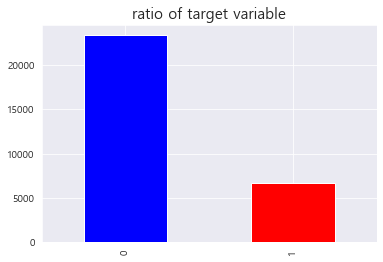

In [21]:
# 당연하겠지만 연체(1)가 납부(0)보다 낮다.
# SMOTH로 비율을 일정하게 맞춰줄 필요가 존재해 보인다.
df['default payment next month'].value_counts().plot(kind='bar', color=['b','r'])
plt.title('ratio of target variable', fontsize=15); plt.show()

In [22]:
df['default payment next month'].value_counts() / len(df)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [23]:
df[df.columns[1:6]].describe().applymap(lambda x : '{:.2f}'.format(x))

# LIMIT_BAL : 주어진 크레딧 금액 (NT 달러), 개인 소비자 크레딧과 가족 (보충) 크레딧이 모두 포함
# SEX : 성별 (1 = male; 2 = female). 
# EDUCATION : 교육 수준 (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
# MARRIAGE : 결혼 여부 (0 = others, 1 = married, 2 = single, 3 = divorce)
# AGE : 나이

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
count,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,1.60,1.85,1.55,35.49
std,129747.66,0.49,0.79,0.52,9.22
min,10000.00,1.00,0.00,0.00,21.00
25%,50000.00,1.00,1.00,1.00,28.00
50%,140000.00,2.00,2.00,2.00,34.00
75%,240000.00,2.00,2.00,2.00,41.00
max,1000000.00,2.00,6.00,3.00,79.00


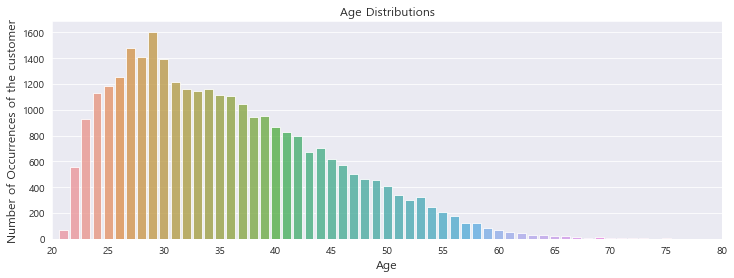

In [24]:
# Age distribution
plt.figure(figsize=(12,4))
age_series = df['AGE'].value_counts().sort_index()
sns.barplot(age_series.index, age_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(
    [-1,  4,  9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59],
    [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
)
plt.title('Age Distributions')
plt.show()

연령대
20 ages         12230
30 ages         10320
40 ages          5521
over 50 ages     1929
Name: AGE, dtype: int64


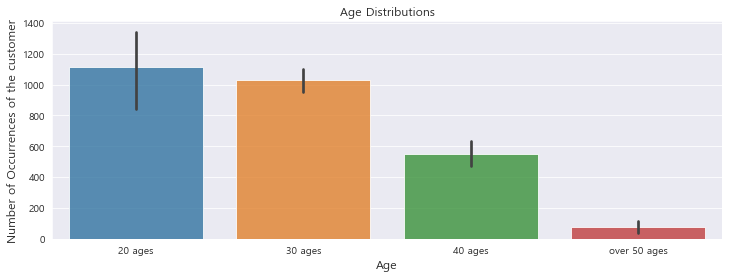

In [25]:
bins = [20, 31, 41, 51, 99]
labels = ['20 ages', '30 ages', '40 ages', 'over 50 ages']
cats = pd.cut(age_series.index, bins, labels=labels)
ages = pd.concat((age_series, pd.Series(cats, age_series.index)), axis=1)
ages.columns = ['AGE', '연령대']
print(ages.groupby('연령대')['AGE'].sum())
# Age distribution
plt.figure(figsize=(12,4))
sns.barplot(ages['연령대'], ages.AGE, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.title('Age Distributions')
plt.show()

- SEX, EDUCATION, MARRIAGE는 수치변수로 표시되어 있으나 모두 범주형 변수
- AGE도 바로 변수로 대입하는 것이 아닌 유아, 청소년, 학생, 직장인, 노인으로 구분지어 범주형으로 변환
    - 위의 기준은 worldbank의 나이 기준을 사용하자

In [26]:
# 범주형 변수 control
print('SEX ' + str(sorted(df['SEX'].unique())))
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))

SEX [1, 2]
EDUCATION [0, 1, 2, 3, 4, 5, 6]
MARRIAGE [0, 1, 2, 3]


In [27]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

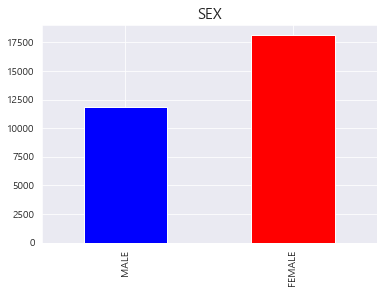

In [28]:
df['SEX'].value_counts().sort_index().plot(kind='bar', color=['b','r'])
plt.xticks([0, 1], ['MALE', 'FEMALE'])
plt.title('SEX', fontsize=15); plt.show()

- Education은 초등, 대학, 고등 그리고 나머지 4가지 범주로 정의
- 그러나 현재 값에는 0, 5, 6의 값들이 존재
- 이를 4로 할당하여 4가지 범주로 유지한다.

1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64


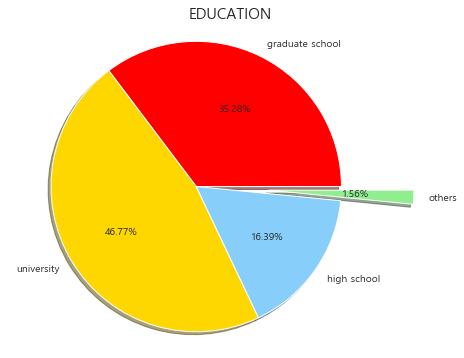

In [29]:
df['EDUCATION'] = df['EDUCATION'].replace({0:4, 5:4, 6:4}) # 0, 5, 6을 4로 바꿔준다.

print(df['EDUCATION'].value_counts().sort_index())

# EDUCATION Category Visualization
plt.figure(figsize=(8, 6))
explode = (0, 0, 0, .5)
labels = ['graduate school', 'university', 'high school', 'others']
colors = ['Red', 'gold', 'lightskyblue', 'lightgreen']
plt.pie(df['EDUCATION'].value_counts().sort_index(), 
        explode=explode, labels=labels, 
        autopct='%1.2f%%', colors=colors, shadow=True)
plt.axis('equal')
plt.title('EDUCATION', fontsize=15)
plt.show()

0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64


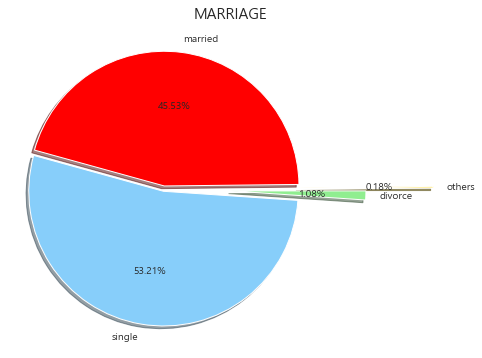

In [30]:
print(df['MARRIAGE'].value_counts().sort_index())

# MARRIAGE Category Visualization
plt.figure(figsize=(8, 6))
explode = (1, .02, .02, .5)
labels = ['others', 'married', 'single', 'divorce']
colors = ['gold', 'Red', 'lightskyblue', 'lightgreen']
plt.pie(df['MARRIAGE'].value_counts().sort_index(), 
        explode=explode, labels=labels, 
        autopct='%1.2f%%', colors=colors, shadow=True)
plt.axis('equal')
plt.title('MARRIAGE', fontsize=15)
plt.show()

## X6 ~ X11

In [31]:
df[[i for i in df.columns if 'PAY_' in i and 'AMT' not in i]].describe().applymap(lambda x : '{:12.2f}'.format(x))

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29
std,1.12,1.20,1.20,1.17,1.13,1.15
min,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,8.00,8.00,8.00,8.00,8.00


- PAY_n 변수들도 단순 수치변수같아 보이지는 않는다.
- 각 columns에 어떠한 속성값들이 존재하는지, 몇 개인지 찍어보자.

In [32]:
p = pd.DataFrame()
for n in [6, 5, 4, 3, 2, 0]:
    p = pd.concat((p, df['PAY_{}'.format(n)].value_counts().sort_index()), axis=1)
p.fillna('-')

# PAY_n 변수들의 연체이력 value count
# PAY_0 : '05.09 상환상태, PAY_2 : '05.08 상환상태, ... , PAY_6 : '05.04 상환상태
# -2 = 소비 없음; -1 = 전부 지불; 0 = 회전 신용 사용 (유료 최소); 1 = 1 개월 지불 지연; 2 = 2 개월 지불 지연; . . .; 8 = 8 개월 지불 지연; 9 = 9 개월 이상 지불 지연

,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0
-2,4895,4546,4348,4085,3782,2759
-1,5740,5539,5687,5938,6050,5686
0,16286,16947,16455,15764,15730,14737
1,-,-,2,4,28,3688
2,2766,2626,3159,3819,3927,2667
3,184,178,180,240,326,322
4,49,84,69,76,99,76
5,13,17,35,21,25,26
6,19,4,5,23,12,11
7,46,58,58,27,20,9


- 위를 찍어보니 이 또한 범주형 변수의 느낌을 가지는 수치 변수임을 알 수 있다.
    - -2, -1, 0 vs 1 ~ 8 로 나누어 생각할 수 있다.
        - 1 ~ 8은 연체 지불 개월 수로 수치형 변수로 생각할 수 있고
        - -2, -1, 0과 1~8로 이 사람의 상태를 범주형으로 만들 수도 있다.
- '05년 9월에 1개월 연체자가 급격하게 증가했다.
    - 이러한 수치의 증가가 우리의 [target : 최종 연체 여부]에 크게 영향을 줄 수 있으니 염두해두자.
- PAY_0은 BILL_AMT, PAY_AMT변수와 비교했을 때 PAY_1로 변수명을 교체해주는 것이 loop을 돌릴 때 편리하게 보인다.
    - 수정해주자,

In [33]:
df = df.rename(columns = {'PAY_0' : 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [34]:
df[[i for i in df.columns if 'BILL_' in i]].describe().applymap(lambda x : '{:.2f}'.format(x))

# Amount of bill statement (NT dollar)
# BILL_AMT1 : '05.09, BILL_AMT2 : '05.08, ... , BILL_AMT6 : '05.04

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,51223.33,49179.08,47013.15,43262.95,40311.40,38871.76
std,73635.86,71173.77,69349.39,64332.86,60797.16,59554.11
min,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
25%,3558.75,2984.75,2666.25,2326.75,1763.00,1256.00
50%,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00
75%,67091.00,64006.25,60164.75,54506.00,50190.50,49198.25
max,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00


- 왜 지급에 minus가 있지? 체크

In [35]:
df[[i for i in df.columns if 'PAY_AMT' in i]].describe().applymap(lambda x : '{:12.2f}'.format(x))

# Amount of previous payment
# PAY_AMT1 : '05.09, PAY_AMT2 : '05.08, ... , PAY_AMT6 : '05.04

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50
std,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,1000.00,833.00,390.00,296.00,252.50,117.75
50%,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
75%,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00
max,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00


- BILL_AMT_n과 PAY_AMT_n은 단위 NT dollar인 수치 변수
- LIMIT_BAL를 활용하여 feature로 만들자.

## Corr Visualization

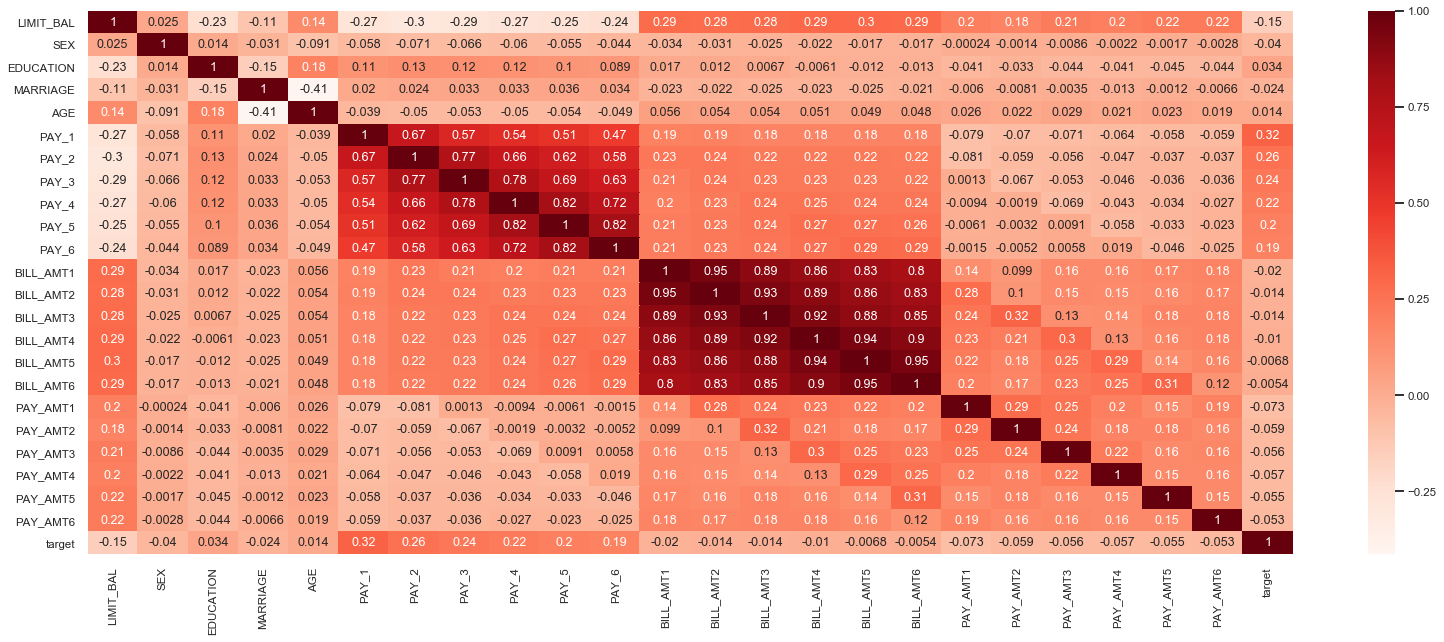

In [36]:
# 긴 target 변수명 변경
df = df.rename(columns={'default payment next month' : 'target'})

# correlation heatmap
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(df.iloc[:,1:].corr(), cmap='Reds', annot=True);

- for n in [1,2,3,4,5,6], PAY_n, BILL_AMT_n 끼리의 상관관계는 매우 높다.
- PAY_AMT_n들의 공산성은 위의 변수들보단 적다.
- LIMIT_BAL과 BILL_AMT 간의 상관관계는 대략 30%정도 된다.
- Target과 가장 높은 상관관계를 보이는 것은 PAY변수이다.
    - 특히 PAY_1이 가장 높은데, 이는 05년 9월이 예측하기에 시기적으로 제일 가깝기 때문으로 생각할 수 있다.
    - CLient들의 지불 행위가 불이행에 대한 강한 시그널을 제시함을 알 수 있다.

>## $\text{Summary}$
- SEX, EDUCATION, MARRIAGE는 범주형 변수
- AGE, PAY_n은 준 범수형 변수
    - AGE는 4~5 category로 나누어 범주형 변수로
    - PAY_n은 
        - -2, -1, 0, (1~8)로 묶어 하나의 범주형 변수로
        - 그리고 (1~8)을 수치형 변수로 줄 예정
- LIMIT_BAL, BILL_AMTn, PAT_AMTn은 단위가 NT dollar인 수치 변수
    - BILL_AMTn 변수들 사이에는 다중공산성이 존재한다.
        - 이를 처리할 방안을 모색하자
    - LIMIT_BAL을 활용하여 새로운 변수를 generate할 수도 있다.
- target은 0 : 1 = 77.8 : 22.2의 비율로 unbalance하다.
    - 현재 dataset은 총 30,000개의 인스턴스를 지닌다.
    - 증식기법 : SMOTH, VAE, GAN
    - 감식기법 : sample 버리기? 증식기법을 활용하자.

## EDUCATION vs TARGET

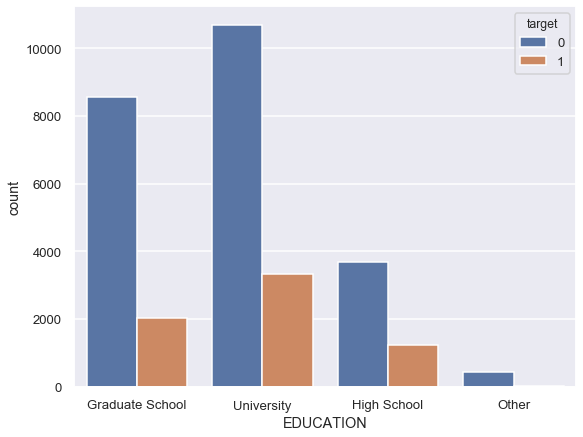

In [37]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUCATION', hue='target', data=df)
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

In [38]:
# Set colormap equal to seaborns light green color palette
cm = sns.light_palette("green", as_cmap=True)

# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('color', '#6d6d6d'),
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

table1 = pd.concat((df.groupby(['EDUCATION', 'target'])['ID'].count().unstack(),
                    df.groupby(['EDUCATION', 'target'])['ID'].count().unstack() / \
                        df['EDUCATION'].value_counts().sort_index().values.reshape(-1,1)), 
                   axis=1)
table1.index = ['Graduate School','University','High School','Other']
table1.columns = ['Not DEFAULT', 'DEFAULT', 'Not DEFAULT(%)', 'DEFAULT(%)']

(table1.style
  .background_gradient(cmap=cm, subset=table1.columns)
  .set_caption('EDUCATION vs TARGET')
  .format({'Not DEFAULT(%)': "{:.2%}", 'DEFAULT(%)': "{:.2%}"})
  .set_table_styles(styles))

,Not DEFAULT,DEFAULT,Not DEFAULT(%),DEFAULT(%)
Graduate School,8549,2036,80.77%,19.23%
University,10700,3330,76.27%,23.73%
High School,3680,1237,74.84%,25.16%
Other,435,33,92.95%,7.05%


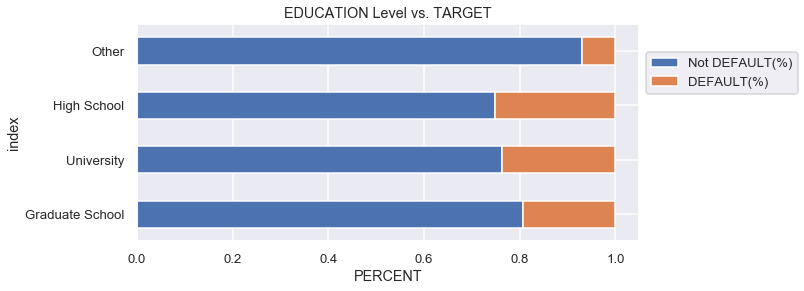

In [39]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_context("talk", font_scale=0.8)

ax = table1[table1.columns[2:]].reset_index().plot(
    x='index', kind='barh', stacked=True, title='EDUCATION Level vs. TARGET')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()

- DEFAULT Count로 보면 대학생의 default 확률이 제일 높다.
- 그러나 DEFAULT Ratio로 보면 고등학생의 default 확률이 제일 높은 것을 확인할 수 있다.

## MARRIAGE vs TARGET

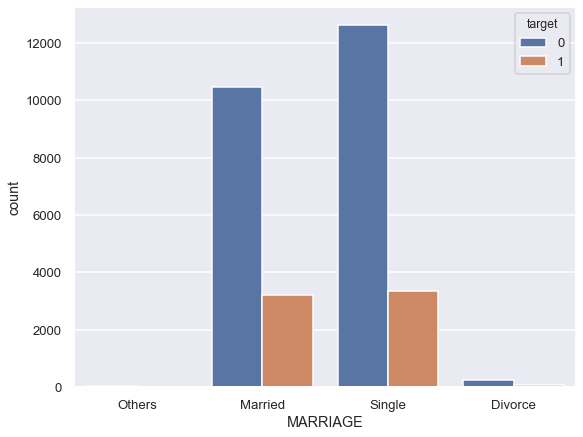

In [40]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

marri = sns.countplot(x="MARRIAGE", hue='target', data=df )
marri.set_xticklabels(['Others','Married','Single','Divorce'])
plt.show()

In [41]:
table2 = pd.concat((df.groupby(['MARRIAGE', 'target'])['ID'].count().unstack(),
                    df.groupby(['MARRIAGE', 'target'])['ID'].count().unstack() / \
                        df['MARRIAGE'].value_counts().sort_index().values.reshape(-1,1)), 
                   axis=1)
table2.index = ['Others','Married','Single','Divorce']
table2.columns = ['Not DEFAULT', 'DEFAULT', 'Not DEFAULT(%)', 'DEFAULT(%)']

(table2.style
  .background_gradient(cmap=cm, subset=table2.columns)
  .set_caption('MARRIAGE vs TARGET')
  .format({'Not DEFAULT(%)': "{:.2%}", 'DEFAULT(%)': "{:.2%}"})
  .set_table_styles(styles))

,Not DEFAULT,DEFAULT,Not DEFAULT(%),DEFAULT(%)
Others,49,5,90.74%,9.26%
Married,10453,3206,76.53%,23.47%
Single,12623,3341,79.07%,20.93%
Divorce,239,84,73.99%,26.01%


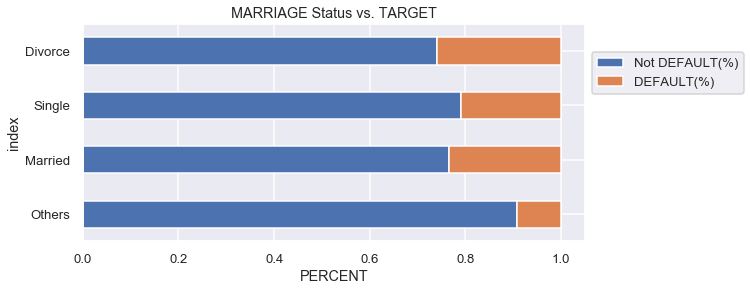

In [42]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_context("talk", font_scale=0.8)

ax = table2[table2.columns[2:]].reset_index().plot(
    x='index', kind='barh', stacked=True, title='MARRIAGE Status vs. TARGET')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()

- 이혼에 대한 Default Count가 Single & Married보다 훨씬 낮다.
- 그러나 Default Percentage의 관점에서 볼 때, 이혼하는 사람들은 불이행 가능성이 더 높은 것을 확인할 수 있다.

## Explore Credit Behaviour

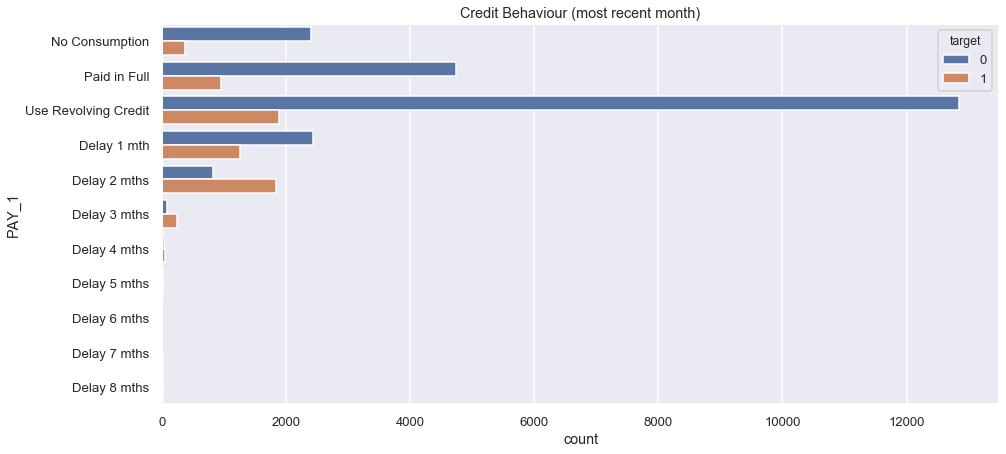

In [43]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)

pay1 = sns.countplot(y="PAY_1", hue='target', data=df)
pay1.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Credit Behaviour (most recent month)')

plt.show()

In [44]:
table3 = pd.concat((df.groupby(['PAY_1', 'target'])['ID'].count().unstack(),
                    df.groupby(['PAY_1', 'target'])['ID'].count().unstack() / \
                        df['PAY_1'].value_counts().sort_index().values.reshape(-1,1)), 
                   axis=1)
table3.index = ['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
             ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths']
table3.columns = ['Not DEFAULT', 'DEFAULT', 'Not DEFAULT(%)', 'DEFAULT(%)']

(table3.style
  .background_gradient(cmap=cm, subset=table3.columns)
  .set_caption('PAY_1 vs TARGET')
  .format({'Not DEFAULT(%)': "{:.2%}", 'DEFAULT(%)': "{:.2%}"})
  .set_table_styles(styles))

,Not DEFAULT,DEFAULT,Not DEFAULT(%),DEFAULT(%)
No Consumption,2394,365,86.77%,13.23%
Paid in Full,4732,954,83.22%,16.78%
Use Revolving Credit,12849,1888,87.19%,12.81%
Delay 1 mth,2436,1252,66.05%,33.95%
Delay 2 mths,823,1844,30.86%,69.14%
Delay 3 mths,78,244,24.22%,75.78%
Delay 4 mths,24,52,31.58%,68.42%
Delay 5 mths,13,13,50.00%,50.00%
Delay 6 mths,5,6,45.45%,54.55%
Delay 7 mths,2,7,22.22%,77.78%


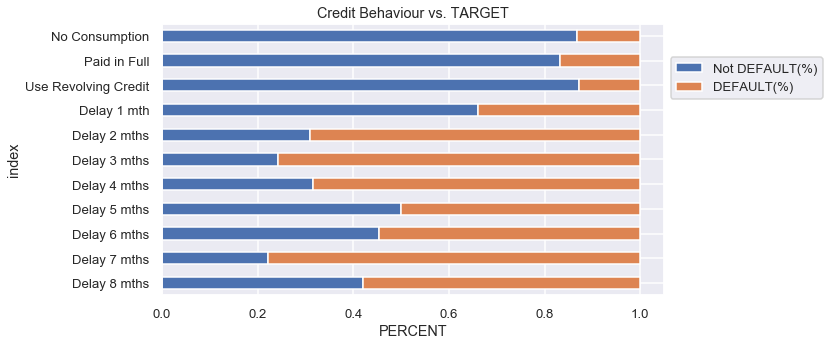

In [45]:
sns.set(rc={'figure.figsize':(9,5)})
sns.set_context("talk", font_scale=0.8)

ax = table3[table3.columns[2:]].reset_index().sort_index(ascending=False).plot(
    x='index', kind='barh', stacked=True, title='Credit Behaviour vs. TARGET')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()

- 회전 신용을 사용하는 사람 (최소 지불 만 해당)과 2 개월 동안 지연된 사람은 가장 높은 Default count를 가진다.
    - 회전 신용을 사용하는 사람의 default ratio는 제일 낮다!
- 지불이 2 개월 이상 지연되면 Default 가능성이 50 % 이상으로 높아진다.

# $\text{XGBOOST}$

In [46]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [47]:
df_drop = df.loc[df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].replace(-2, np.nan).dropna().index]
df_drop.shape

(23439, 25)

In [48]:
X = df_drop[[col for col in df_drop.columns if (col != 'target') and (col != 'ID')]]
y = df_drop['target']

X.shape, y.shape

((23439, 23), (23439,))

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20190730, stratify=y)
print("Size of train dataset: {} rows".format(X_train.shape[0]))
print("Size of test dataset: {} rows".format(X_test.shape[0]))

Size of train dataset: 16407 rows
Size of test dataset: 7032 rows


In [50]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_jobs=-1)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [51]:
y_pred = xgb_clf.predict_proba(X_test)
y_true = y_test.values

from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred.argmax(axis=1))

0.8189704209328783

In [52]:
df_drop = pd.concat((df_drop,
                     pd.get_dummies(df_drop['EDUCATION'], prefix='EDUCATION'),
                     pd.get_dummies(df_drop['MARRIAGE'], prefix='MARRIAGE')),
                    axis=1)
del df_drop['EDUCATION']
del df_drop['MARRIAGE']
df_drop.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT6,target,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,2,120000,2,26,-1,2,0,0,0,2,...,2000,1,0,1,0,0,0,0,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,5000,0,0,1,0,0,0,0,1,0
3,4,50000,2,37,0,0,0,0,0,0,...,1000,0,0,1,0,0,0,1,0,0
4,5,50000,1,57,-1,0,-1,0,0,0,...,679,0,0,1,0,0,0,1,0,0
5,6,50000,1,37,0,0,0,0,0,0,...,800,0,1,0,0,0,0,0,1,0


In [53]:
X = df_drop[[col for col in df_drop.columns if (col != 'target') and (col != 'ID')]]
y = df_drop['target']

X.shape, y.shape

((23439, 29), (23439,))

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20190730, stratify=y)
print("Size of train dataset: {} rows".format(X_train.shape[0]))
print("Size of test dataset: {} rows".format(X_test.shape[0]))

Size of train dataset: 16407 rows
Size of test dataset: 7032 rows


In [55]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_jobs=-1)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [56]:
y_pred = xgb_clf.predict_proba(X_test)
y_pred

array([[0.4178782 , 0.5821218 ],
       [0.94218934, 0.05781065],
       [0.8948282 , 0.10517178],
       ...,
       [0.9143653 , 0.08563474],
       [0.883857  , 0.11614296],
       [0.89133537, 0.10866465]], dtype=float32)

In [57]:
y_true = y_test.values

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred.argmax(axis=1))

0.819254835039818

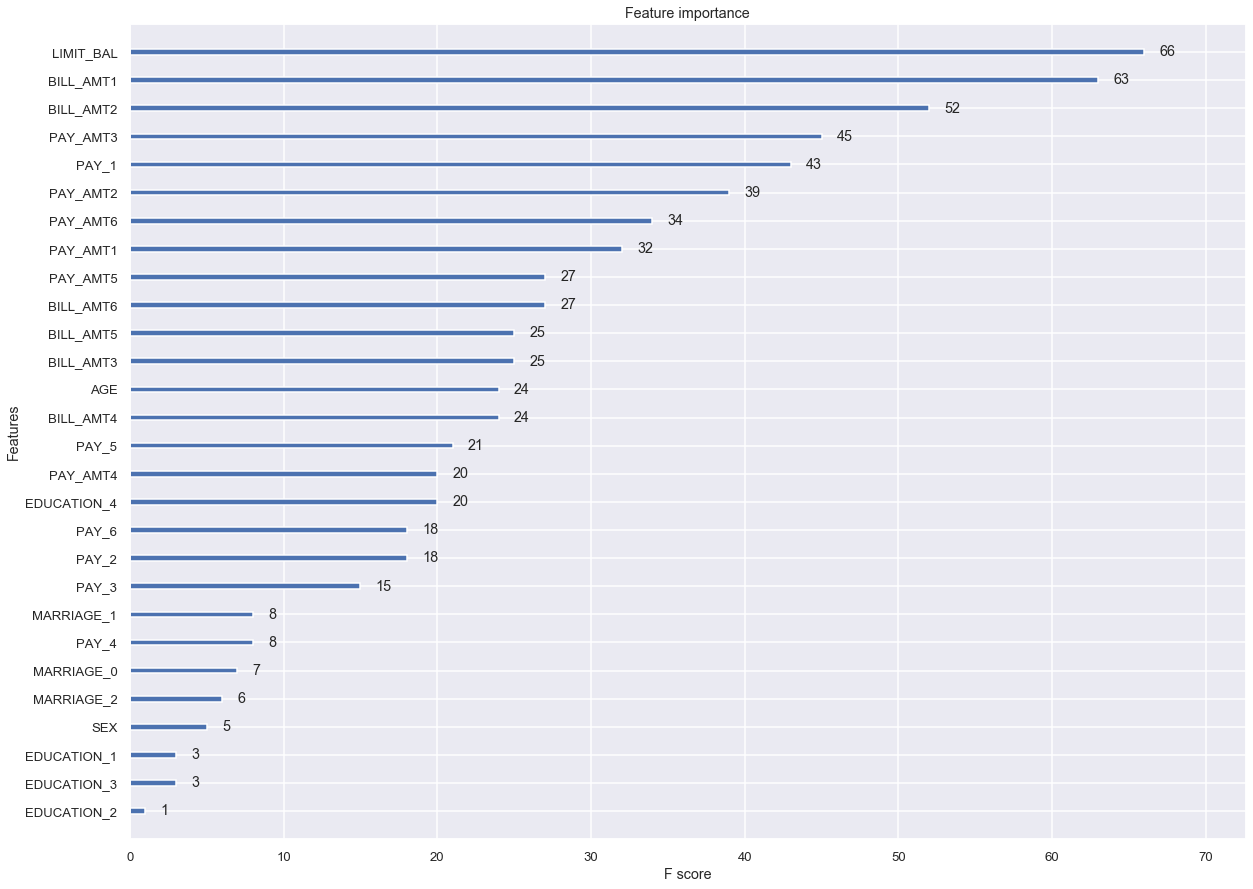

In [59]:
import xgboost as xgb
plt.figure(figsize=(20,15))
xgb.plot_importance(xgb_clf, ax=plt.gca())

# 그냥은?

In [60]:
X = df[[col for col in df.columns if (col != 'target') and (col != 'ID')]]
y = df['target']

print(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20190730,
                                                    stratify=y)
print("Size of train dataset: {} rows".format(X_train.shape[0]))
print("Size of test dataset: {} rows".format(X_test.shape[0]))

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_jobs=-1)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict_proba(X_test)
y_true = y_test.values

from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred.argmax(axis=1))

(30000, 23) (30000,)
Size of train dataset: 21000 rows
Size of test dataset: 9000 rows


0.822

# 제거하고 GridSearchCV

In [61]:
X = df_drop[[col for col in df_drop.columns if (col != 'target') and (col != 'ID')]]
y = df_drop['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20190730, stratify=y)
print("Size of train dataset: {} rows".format(X_train.shape[0]))
print("Size of test dataset: {} rows".format(X_test.shape[0]))

Size of train dataset: 16407 rows
Size of test dataset: 7032 rows


In [62]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
xgb_clf = xgb.XGBClassifier()

parameters = [{'objective':['binary:logistic'],
              'learning_rate': [1, 0.1, 0.01, 0.001], #so called `eta` value
              'max_depth': [3, 5, 7],
              'min_child_weight': [3, 5, 7],
              'gamma' : [10, 1, 0.1, 0.01],
              'subsample': [0.3, 0.5, 0.7],
              'colsample_bytree': [0.3, 0.5, 0.7],
              'n_estimators': [3, 50, 100, 500]}]


grid_xgb_clf = GridSearchCV(xgb_clf, param_grid=parameters,
                   cv=StratifiedKFold(n_splits=3, shuffle=True),
                   scoring='accuracy', verbose=10, n_jobs=-1)

In [56]:
grid_xgb_clf.fit(X_train, y_train)

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

KeyboardInterrupt: 

```
import pickle
with open('xgb_grid_model.pickle', 'wb') as f:
    pickle.dump(grid_xgb_clf, f, protocol=pickle.HIGHEST_PROTOCOL)
```

In [63]:
import pickle
with open('xgb_grid_model.pickle', 'rb') as f:
    grid_xgb_clf = pickle.load(f)

In [64]:
grid_xgb_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [65]:
bst_xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

bst_xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [66]:
y_pred = bst_xgb_clf.predict(X_test)
y_true = y_test.values

In [67]:
accuracy_score(y_true, y_pred)

0.8229522184300341

### 높이자 성능!

- AGE 범주화
    - 82.28%

In [68]:
df2 = df.copy()
df2.AGE = df2.AGE.map(lambda x : np.where(x <= 25, 0, 
                                      np.where(x <= 40, 1, 2)))

In [69]:
X = df2[[col for col in df.columns if (col != 'target') and (col != 'ID')]]
y = df2['target']

print(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20190730,
                                                    stratify=y)
print("Size of train dataset: {} rows".format(X_train.shape[0]))
print("Size of test dataset: {} rows".format(X_test.shape[0]))

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_jobs=-1)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict_proba(X_test)
y_true = y_test.values

from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred.argmax(axis=1))

(30000, 23) (30000,)
Size of train dataset: 21000 rows
Size of test dataset: 9000 rows


0.8228888888888889

- AGE Square Root Transform
    - 82.2%

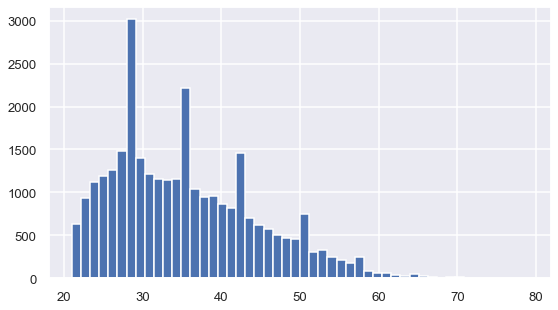

In [70]:
plt.hist(df.AGE, bins=50); plt.show()

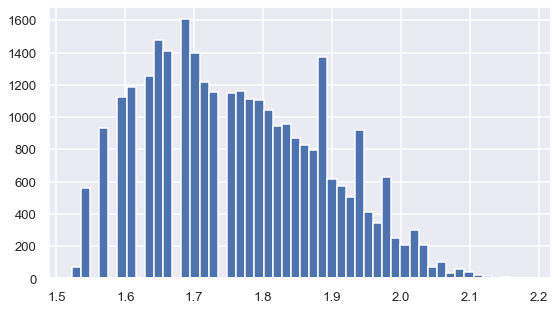

In [71]:
plt.hist(np.log(df.AGE ** .5), bins=50); plt.show()

In [72]:
df3 = df.copy()
df3.AGE = np.log(df3.AGE ** .5)

In [73]:
X = df3[[col for col in df.columns if (col != 'target') and (col != 'ID')]]
y = df3['target']

print(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20190730,
                                                    stratify=y)
print("Size of train dataset: {} rows".format(X_train.shape[0]))
print("Size of test dataset: {} rows".format(X_test.shape[0]))

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_jobs=-1)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict_proba(X_test)
y_true = y_test.values

from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred.argmax(axis=1))

(30000, 23) (30000,)
Size of train dataset: 21000 rows
Size of test dataset: 9000 rows


0.822

- Transformation for LIMIT_BAL
    - 82.2%

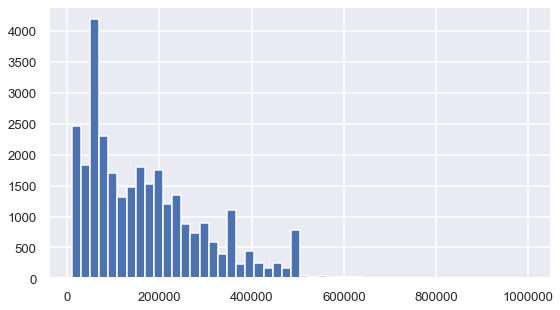

In [74]:
plt.hist(df.LIMIT_BAL, bins=50); plt.show()

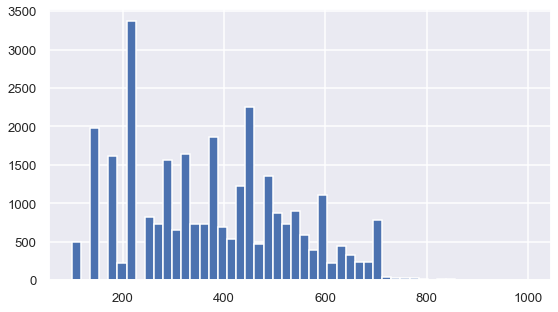

In [75]:
plt.hist(df.LIMIT_BAL ** .5, bins=50); plt.show()

In [76]:
df3 = df.copy()
df3.LIMIT_BAL = df3.LIMIT_BAL ** .5

In [77]:
X = df3[[col for col in df.columns if (col != 'target') and (col != 'ID')]]
y = df3['target']

print(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20190730,
                                                    stratify=y)
print("Size of train dataset: {} rows".format(X_train.shape[0]))
print("Size of test dataset: {} rows".format(X_test.shape[0]))

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_jobs=-1)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict_proba(X_test)
y_true = y_test.values

from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred.argmax(axis=1))

(30000, 23) (30000,)
Size of train dataset: 21000 rows
Size of test dataset: 9000 rows


0.822

- New Feature : Ratio
- Apply PCA on highly correlated features
    - 오히려 떨어짐

In [78]:
df3 = df.copy()
for i in range(1, 7):
    df3['RATIO_{}'.format(i)] = np.abs(df3['PAY_AMT{}'.format(i)] / df3['BILL_AMT{}'.format(i)]).replace({np.nan:1, np.inf:1})
df3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,RATIO_1,RATIO_2,RATIO_3,RATIO_4,RATIO_5,RATIO_6
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,0.000000,0.222115,0.000000,1.000000,1.000000,1.000000
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492


In [79]:
np.random.seed(20190730)
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_pay = pca1.fit_transform(df3[[col for col in df3.columns if 'PAY_AMT' in col]])
X_bill = pca1.fit_transform(df3[[col for col in df3.columns if 'BILL_AMT' in col]])
X_ratio = pca1.fit_transform(df3[[col for col in df3.columns if 'RATIO' in col]])

In [80]:
df3 = pd.concat((df3[[col for col in df3.columns if 
                 ('PAY_AMT' not in col) and 
                 ('BILL_AMT' not in col) and 
                 ('RATIO' not in col) and
                 ('ID' not in col)]],
               pd.DataFrame(X_pay, columns=['PAY']),
               pd.DataFrame(X_bill, columns=['BILL']),
               pd.DataFrame(X_ratio, columns=['RATIO'])), axis=1)
df3.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,target,PAY,BILL,RATIO
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,1,-11443.690236,-107289.378431,-9.561909
1,120000,2,2,2,26,-1,2,0,0,0,2,1,-10043.014174,-103860.702650,-9.192921
2,90000,2,2,2,34,0,0,0,0,0,0,0,-8086.514262,-68874.738469,-9.493554
3,50000,2,2,1,37,0,0,0,0,0,0,0,-8541.459204,-14775.024768,-9.543300
4,50000,1,2,1,57,-1,0,-1,0,0,0,0,22477.983735,-66777.116291,-9.275284


In [81]:
X = df3[[col for col in df3.columns if (col != 'target') and (col != 'ID')]]
y = df3['target']

print(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20190730,
                                                    stratify=y)
print("Size of train dataset: {} rows".format(X_train.shape[0]))
print("Size of test dataset: {} rows".format(X_test.shape[0]))

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_jobs=-1)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict_proba(X_test)
y_true = y_test.values

from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred.argmax(axis=1))

(30000, 14) (30000,)
Size of train dataset: 21000 rows
Size of test dataset: 9000 rows


0.8208888888888889

## 제일 좋았던 거에서 parameter 조정하기

In [82]:
df2 = df.copy()
df2.AGE = df2.AGE.map(lambda x : np.where(x <= 25, 0, 
                                      np.where(x <= 40, 1, 2)))
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000,2,2,1,0,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,1,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,1,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,1,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,2,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [83]:
df2 = df2[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'target']]

X = df2[[col for col in df2.columns if (col != 'target') and (col != 'ID')]]
y = df2['target']

print(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20190730,
                                                    stratify=y)
print("Size of train dataset: {} rows".format(X_train.shape[0]))
print("Size of test dataset: {} rows".format(X_test.shape[0]))

from xgboost import XGBClassifier

# for n in range(1, 500, 3):
n = 100
xgb_clf = XGBClassifier(n_jobs=-1,
                        n_estimators=n,
                        max_depth=3,
                        learning_rate=0.1,
                        booster='gbtree',
                        gamma=0,
                        min_child_weight=1,
                        max_delta_step=0,
                        subsample=1,
                        colsample_bytree=1,
                        random_state=20190730)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict_proba(X_test)
y_true = y_test.values
del xgb_clf
from sklearn.metrics import accuracy_score
print(n, accuracy_score(y_true, y_pred.argmax(axis=1)))

(30000, 23) (30000,)
Size of train dataset: 21000 rows
Size of test dataset: 9000 rows
100 0.8228888888888889


# $\text{CNN}$

In [84]:
# tensor graph 초기화
import tensorflow as tf
tf.reset_default_graph()

import keras.backend as K
K.clear_session()

from keras.models import Sequential
from keras.layers import Dense

def DNNClassifier2():
    model = Sequential()
    model.add(Dense(8, input_shape=(8,), activation='relu', name='layer1'))
    model.add(Dense(1, activation='sigmoid', name='layer2'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

model = DNNClassifier2()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 8)                 72        
_________________________________________________________________
layer2 (Dense)               (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [85]:
X = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1']]
y = df['target']
# y = df['default payment next month']
X.shape, y.shape

((30000, 8), (30000,))

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=.3, random_state=20190730)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21000, 8), (9000, 8), (21000,), (9000,))

In [87]:
# Standard normalization 기법으로 feature scale 조정
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

In [88]:
y_train.value_counts() / len(y_train)

0    0.77881
1    0.22119
Name: target, dtype: float64

In [89]:
y_test.value_counts() / len(y_test)

0    0.778778
1    0.221222
Name: target, dtype: float64

In [90]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
21000/21000 [==============================] - 2s 113us/step - loss: 0.5225 - acc: 0.7900
Epoch 2/10
21000/21000 [==============================] - 2s 91us/step - loss: 0.4636 - acc: 0.8089
Epoch 3/10
21000/21000 [==============================] - 2s 94us/step - loss: 0.4578 - acc: 0.8120
Epoch 4/10
21000/21000 [==============================] - 2s 93us/step - loss: 0.4549 - acc: 0.8149
Epoch 5/10
21000/21000 [==============================] - 2s 95us/step - loss: 0.4532 - acc: 0.8152
Epoch 6/10
21000/21000 [==============================] - 2s 96us/step - loss: 0.4515 - acc: 0.8167
Epoch 7/10
21000/21000 [==============================] - 2s 96us/step - loss: 0.4507 - acc: 0.8166
Epoch 8/10
21000/21000 [==============================] - 2s 97us/step - loss: 0.4495 - acc: 0.8180
Epoch 9/10
21000/21000 [==============================] - 2s 99us/step - loss: 0.4486 - acc: 0.8186
Epoch 10/10
21000/21000 [==============================] - 2s 102us/step - loss: 0.4482 - acc: 0.81

In [91]:
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.copy()

accuracy_score(y_true, y_pred)

0.7787777777777778

- 뭔가 이상한 결과가 나온다.. 왜 이럴까?

In [92]:
model.predict(X_test)

array([[0.11904094],
       [0.11631748],
       [0.5476439 ],
       ...,
       [0.12708   ],
       [0.3278162 ],
       [0.3337161 ]], dtype=float32)

- 멍청하게 argmax를 취하고 있었다... unit 1로 return 받아 놓고..
- 다시 결과를 찍어보자

In [93]:
y_pred = np.where(model.predict(X_test) > .5, 1, 0)
y_true = y_test.copy()

accuracy_score(y_true, y_pred)

0.8194444444444444

- 모든 결과값을 0으로 만들었던 argmax 문제도 해결했겠다, CNN을 다시 돌려보자!

In [94]:
df3 = df.copy()
df3.AGE = df3.AGE.map(lambda x : np.where(x <= 25, 0, 
                                      np.where(x <= 40, 1, 2)))
for i in range(1, 7):
    df3['RATIO_{}'.format(i)] = np.abs(df3['PAY_AMT{}'.format(i)] / df3['BILL_AMT{}'.format(i)]).replace({np.nan:1, np.inf:1})
df3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,RATIO_1,RATIO_2,RATIO_3,RATIO_4,RATIO_5,RATIO_6
0,1,20000,2,2,1,0,2,2,-1,-1,...,0,0,0,1,0.000000,0.222115,0.000000,1.000000,1.000000,1.000000
1,2,120000,2,2,2,1,-1,2,0,0,...,1000,0,2000,1,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309
2,3,90000,2,2,2,1,0,0,0,0,...,1000,1000,5000,0,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564
3,4,50000,2,2,1,1,0,0,0,0,...,1100,1069,1000,0,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844
4,5,50000,1,2,1,2,-1,0,-1,0,...,9000,689,679,0,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492


In [95]:
# 학습을 위해 feature sets / target set으로 분리
X = df3[[col for col in df3.columns if 'ID' not in col and 'target' not in col]]
y = df3['target']

# # train / test를 7:3으로 분리
# X_train = X[:int(len(X) * 0.7)]
# y_train = y[:int(len(X) * 0.7)]
# X_test = X[int(len(X) * 0.7):]
# y_test = y[int(len(X) * 0.7):]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, random_state=20190730,
                                                    stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21000, 29), (21000,), (9000, 29), (9000,))

In [96]:
# Standard normalization 기법으로 feature scale 조정
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std
# train_max = X_train.max(axis=0)
# train_min = X_train.min(axis=0)

# X_train = (X_train - train_min) / (train_max - train_min)
# X_test = (X_test - train_min) / (train_max - train_min)

# train_max = X_train[scale_col].max(axis=0)
# train_min = X_train[scale_col].min(axis=0)

# X_train[scale_col] = (X_train[scale_col] - train_min) / (train_max - train_min)
# X_test[scale_col] = (X_test[scale_col] - train_min) / (train_max - train_min)

In [97]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                      stratify=y_train, test_size=.3,
                                                      random_state=20190730)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((14700, 29), (6300, 29), (14700,), (6300,))

In [100]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, AvgPool2D, Reshape
from keras.optimizers import Adam

K.clear_session()

def CNNClassifier():
    model = Sequential()
    model.add(Dense(32, input_shape=(29,), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Reshape((1, 128, 1)))
    model.add(Conv2D(32, input_shape=(1, 128, 1), activation='relu',
                     kernel_size=(1, 2), strides=(1, 2), padding='VALID'))
    model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 1), padding='VALID'))
    model.add(Conv2D(64, activation='relu',
                     kernel_size=(1, 3), strides=(1, 2), padding='VALID'))
    model.add(AvgPool2D(pool_size=(1, 2), strides=(1, 2), padding='VALID'))
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dense(1, activation='sigmoid'))
    adam = Adam(lr=.01)
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

model = CNNClassifier()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                960       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 128, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 64, 32)         96        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 63, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 31, 64)         6208      
_________________________________________________________________
average_pooling2d_1 (Average (None, 1, 15, 64)        

In [106]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_valid, y_valid))

Train on 14700 samples, validate on 6300 samples
Epoch 1/100
14700/14700 [==============================] - 3s 195us/step - loss: 0.4285 - acc: 0.8203 - val_loss: 0.4494 - val_acc: 0.8132
Epoch 2/100
14700/14700 [==============================] - 3s 196us/step - loss: 0.4287 - acc: 0.8203 - val_loss: 0.4439 - val_acc: 0.8124
Epoch 3/100
14700/14700 [==============================] - 3s 198us/step - loss: 0.4282 - acc: 0.8216 - val_loss: 0.4484 - val_acc: 0.8127
Epoch 4/100
14700/14700 [==============================] - 3s 200us/step - loss: 0.4237 - acc: 0.8238 - val_loss: 0.4360 - val_acc: 0.8130
Epoch 5/100
14700/14700 [==============================] - 3s 199us/step - loss: 0.4234 - acc: 0.8240 - val_loss: 0.4462 - val_acc: 0.8043
Epoch 6/100
14700/14700 [==============================] - 3s 203us/step - loss: 0.4207 - acc: 0.8239 - val_loss: 0.4497 - val_acc: 0.8114
Epoch 7/100
14700/14700 [==============================] - 3s 203us/step - loss: 0.4213 - acc: 0.8244 - val_loss: 0.4

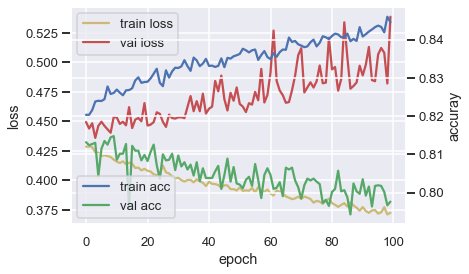

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [108]:
y_pred = np.where(model.predict(X_test) > .5, 1, 0)
y_true = y_test.copy()

accuracy_score(y_true, y_pred)

0.8027777777777778

- Epoch = 10으로 끊자

In [113]:
from keras.callbacks import EarlyStopping

model = CNNClassifier()

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=10,
          validation_data=(X_valid, y_valid))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                960       
_________________________________________________________________
dense_10 (Dense)             (None, 128)               4224      
_________________________________________________________________
reshape_3 (Reshape)          (None, 1, 128, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 64, 32)         96        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 63, 32)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 31, 64)         6208      
_________________________________________________________________
average_pooling2d_3 (Average (None, 1, 15, 64)        

In [114]:
y_pred = np.where(model.predict(X_test) > .5, 1, 0)
y_true = y_test.copy()

accuracy_score(y_true, y_pred)

0.8175555555555556

### 두 개의 Conv를 Concat하여 예측

In [155]:
cat_var = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
cat2_var = ['PAY_1' ,'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
num_var = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
           'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'LIMIT_BAL']
y = ['target']

In [156]:
df[cat2_var].applymap(lambda x : x if x <= 0 else 1).head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,1,-1,-1,-2,-2
1,-1,1,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [157]:
p = pd.DataFrame()
for n in range(6, 0, -1):
    p = pd.concat((p, df['PAY_{}'.format(n)].value_counts().sort_index()), axis=1)
p

,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_1
-2,4895.0,4546.0,4348,4085,3782,2759
-1,5740.0,5539.0,5687,5938,6050,5686
0,16286.0,16947.0,16455,15764,15730,14737
1,NaN,NaN,2,4,28,3688
2,2766.0,2626.0,3159,3819,3927,2667
3,184.0,178.0,180,240,326,322
4,49.0,84.0,69,76,99,76
5,13.0,17.0,35,21,25,26
6,19.0,4.0,5,23,12,11
7,46.0,58.0,58,27,20,9


연령대
20-25     5127
26-40    17423
40-80     7450
Name: AGE, dtype: int64


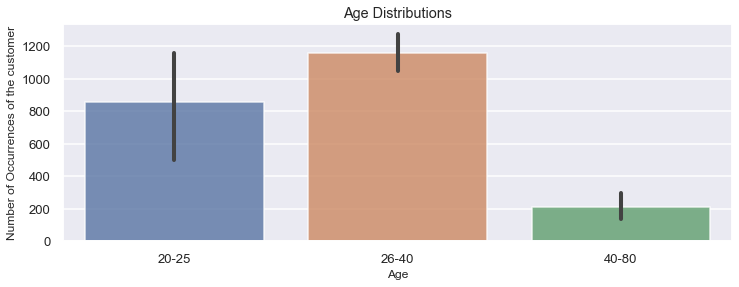

In [158]:
age_series = df['AGE'].value_counts().sort_index()
bins = [20, 26, 41, 90]
labels = ['20-25', '26-40', '40-80']
cats = pd.cut(age_series.index, bins, labels=labels)
ages = pd.concat((age_series, pd.Series(cats, age_series.index)), axis=1)
ages.columns = ['AGE', '연령대']
print(ages.groupby('연령대')['AGE'].sum())

# Age distribution
plt.figure(figsize=(12, 4))
sns.barplot(ages['연령대'], ages.AGE, alpha=.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.title('Age Distributions')
plt.show()

In [159]:
p = pd.DataFrame()
for col in cat_var:
    if col == 'AGE':
        d = pd.get_dummies(df['AGE'].replace(ages['연령대']), prefix=col)
    else:
        d = pd.get_dummies(df[col], prefix=col)
    p = pd.concat((p, d), axis=1)
p.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE_20-25,AGE_26-40,AGE_40-80
0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,0,1,0,1,0,0,0,0,1,0,1,0,0
2,0,1,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,1,0,0,0,1,0,0,0,1,0
4,1,0,0,1,0,0,0,1,0,0,0,0,1


In [160]:
p2 = pd.DataFrame()
for col in cat2_var:
    p2 = pd.concat((p2, pd.get_dummies(
            df[col].map(lambda x : x if x <= 0 else 1).replace(
                {-2:'no_consum', -1:'full_paid', 0:'rev_cred'}
            ), prefix=col)),
          axis=1)
p2.head()

,PAY_1_1,PAY_1_full_paid,PAY_1_no_consum,PAY_1_rev_cred,PAY_2_1,PAY_2_full_paid,PAY_2_no_consum,PAY_2_rev_cred,PAY_3_1,PAY_3_full_paid,...,PAY_4_no_consum,PAY_4_rev_cred,PAY_5_1,PAY_5_full_paid,PAY_5_no_consum,PAY_5_rev_cred,PAY_6_1,PAY_6_full_paid,PAY_6_no_consum,PAY_6_rev_cred
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [161]:
dummy_data = pd.concat((p, p2), axis=1)
num_data = df[num_var]
y_data = df[y]

dummy_data.shape, num_data.shape, y_data.shape

((30000, 37), (30000, 13), (30000, 1))

In [162]:
# columns shuffling
ind = np.arange(len(dummy_data.columns))
np.random.shuffle(ind)
dummy_data = dummy_data[dummy_data.columns[ind]]
dummy_data.head()

,PAY_4_rev_cred,MARRIAGE_1,PAY_2_rev_cred,PAY_3_rev_cred,PAY_6_full_paid,PAY_6_rev_cred,PAY_4_1,PAY_4_full_paid,PAY_1_1,PAY_3_1,...,PAY_5_1,MARRIAGE_3,PAY_4_no_consum,PAY_1_full_paid,PAY_5_rev_cred,SEX_2,EDUCATION_2,PAY_6_1,EDUCATION_4,PAY_2_full_paid
0,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
2,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
3,1,1,1,1,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
4,1,1,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0


In [163]:
X = pd.concat((num_data, dummy_data), axis=1)
y = y_data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=.3, random_state=20190730)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21000, 50), (9000, 50), (21000, 1), (9000, 1))

In [164]:
# num_var column scaling
train_mean = X_train[num_var].mean(axis=0)
train_std = X_train[num_var].std(axis=0)

num_X_train = (X_train[num_var] - train_mean) / train_std
num_X_test = (X_test[num_var] - train_mean) / train_std

# construct cat_data
cat_X_train = X_train[dummy_data.columns]
cat_X_test = X_test[dummy_data.columns]

num_X_train.shape, num_X_test.shape, cat_X_train.shape, cat_X_test.shape

((21000, 13), (9000, 13), (21000, 37), (9000, 37))

In [165]:
num_X_train, num_X_valid, _, _ = train_test_split(num_X_train, y_train, stratify=y_train,
                                                    test_size=.2, random_state=20190730)
cat_X_train, cat_X_valid, y_train, y_valid = train_test_split(cat_X_train, y_train, stratify=y_train,
                                                    test_size=.2, random_state=20190730)

num_X_train.shape, num_X_valid.shape, cat_X_train.shape, cat_X_valid.shape, y_train.shape, y_valid.shape

((16800, 13), (4200, 13), (16800, 37), (4200, 37), (16800, 1), (4200, 1))

In [166]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Concatenate, MaxPooling2D, AvgPool2D, Reshape
from keras.optimizers import Adam

K.clear_session()

first = Sequential()
first.add(Dense(2, input_shape=(13,), activation='relu'))
first.add(Dense(128))
first.add(Reshape((1, 128, 1)))
first.add(Conv2D(8, activation='relu', padding='VALID',
                 kernel_size=(1, 5), strides=(1, 2)))
first.add(AvgPool2D(pool_size=(1, 2), strides=(1, 2), padding='SAME'))
first.add(Conv2D(32, activation='relu', padding='VALID',
                 kernel_size=(1, 2), strides=(1, 2)))
first.add(Flatten())
first.summary()

second = Sequential()
second.add(Dense(2, input_shape=(37,), activation='relu'))
second.add(Dense(128))
second.add(Reshape((1, 128, 1)))
second.add(Conv2D(8, activation='relu', padding='VALID',
                 kernel_size=(1, 5), strides=(1, 2)))
second.add(AvgPool2D(pool_size=(1, 2), strides=(1, 2), padding='SAME'))
second.add(Conv2D(32, activation='relu', padding='VALID',
                 kernel_size=(1, 2), strides=(1, 2)))
second.add(Flatten())
second.summary()

# Concatenate Both
merged = Concatenate()([first.output, second.output])
output_layer = Dense(64)(merged)
output_layer = Dense(1, activation='sigmoid')(output_layer)

model = Model(inputs=[first.input, second.input], outputs=output_layer)
adam = Adam(lr=.01)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 128)               384       
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 128, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 62, 8)          48        
_________________________________________________________________
average_pooling2d_1 (Average (None, 1, 31, 8)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 15, 32)         544       
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)              

In [168]:
hist = model.fit(x=[num_X_train.values, cat_X_train.values], y=y_train, batch_size=32, epochs=30, verbose=1,
          validation_data=([num_X_valid, cat_X_valid], y_valid))

Train on 16800 samples, validate on 4200 samples
Epoch 1/30
16800/16800 [==============================] - 4s 234us/step - loss: 0.4432 - acc: 0.8155 - val_loss: 0.4478 - val_acc: 0.8090
Epoch 2/30
16800/16800 [==============================] - 4s 232us/step - loss: 0.4427 - acc: 0.8140 - val_loss: 0.4466 - val_acc: 0.8081
Epoch 3/30
16800/16800 [==============================] - 4s 232us/step - loss: 0.4429 - acc: 0.8126 - val_loss: 0.4541 - val_acc: 0.8036
Epoch 4/30
16800/16800 [==============================] - 4s 236us/step - loss: 0.4431 - acc: 0.8141 - val_loss: 0.4500 - val_acc: 0.8114
Epoch 5/30
16800/16800 [==============================] - 4s 236us/step - loss: 0.4416 - acc: 0.8140 - val_loss: 0.4536 - val_acc: 0.8088
Epoch 6/30
16800/16800 [==============================] - 4s 235us/step - loss: 0.4433 - acc: 0.8143 - val_loss: 0.4508 - val_acc: 0.8052
Epoch 7/30
16800/16800 [==============================] - 4s 239us/step - loss: 0.4417 - acc: 0.8155 - val_loss: 0.4514 - v

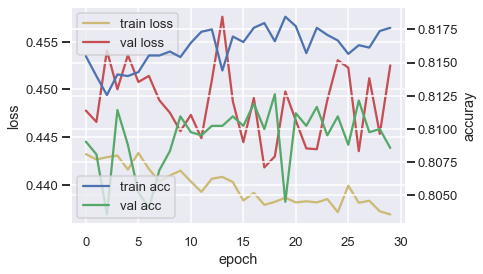

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [172]:
y_pred = np.where(model.predict([num_X_test, cat_X_test]) > .5, 1, 0)
y_true = y_test.copy()

accuracy_score(y_true, y_pred)

0.8153333333333334

- 개선되지는 않았다.
- 시간을 들여서 RESNET을 엮어보면 82를 뚫고 큰 성능 개선의 가능성이 있을지 모른다.

# $\text{VotingClassifier}$

In [201]:
np.random.seed(20190730)

K.clear_session()

# import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

def CNNClassifier():
    model = Sequential()
    model.add(Dense(32, input_shape=(23,), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Reshape((1, 128, 1)))
    model.add(Conv2D(32, input_shape=(1, 128, 1), activation='relu',
                     kernel_size=(1, 2), strides=(1, 2), padding='VALID'))
    model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 1), padding='VALID'))
    model.add(Conv2D(64, activation='relu',
                     kernel_size=(1, 3), strides=(1, 2), padding='VALID'))
    model.add(AvgPool2D(pool_size=(1, 2), strides=(1, 2), padding='VALID'))
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dense(1, activation='sigmoid'))
    adam = Adam(lr=.01)
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

knn_clf = KNeighborsClassifier()
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=100)
xgb_clf = XGBClassifier(n_estimators=100)
lgb_clf = LGBMClassifier(n_estimators=100)
dnn_clf = DNNClassifier()
cnn_clf = CNNClassifier()

vot_clf = VotingClassifier(
    estimators=[('knn', knn_clf), ('log', log_clf), ('rf', rf_clf),
               ('xgb', xgb_clf), ('lgbm', lgb_clf)],
    voting='hard')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                768       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               4224      
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 128, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 64, 32)         96        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 63, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 31, 64)         6208      
_________________________________________________________________
average_pooling2d_1 (Average (None, 1, 15, 64)        

In [202]:
X = df[[col for col in df.columns if (col != 'target') and (col != 'ID')]]
y = df['target']

print(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20190730,
                                                    stratify=y)
print("Size of train dataset: {} rows".format(X_train.shape[0]))
print("Size of test dataset: {} rows".format(X_test.shape[0]))

train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

(30000, 23) (30000,)
Size of train dataset: 21000 rows
Size of test dataset: 9000 rows


In [203]:
for name, clf in [('knn', knn_clf), ('log', log_clf), ('rf', rf_clf),
                  ('xgb', xgb_clf), ('lgbm', lgb_clf), ('voting', vot_clf)]:
    if name not in ['dnn', 'cnn']:
        clf.fit(X_train, y_train)
    else:
        clf.fit(X_train, y_train, epochs=30, batch_size=32, verbose=False)
    y_pred = np.where(clf.predict(X_test) > .5, 1, 0)
    y_true = y_test.values
    print('{:} : {:.2f}%'.format(name, accuracy_score(y_true, y_pred) * 100))

knn : 78.71%
log : 81.20%
rf : 81.39%
xgb : 82.20%
lgbm : 82.11%
voting : 81.91%


# 결론
- XGBoost의 최종 모델 성능 82.29%가 CNN의 81.57%, Voting의 81.91%보다 우수한 성적을 거두었다.
- Conv와 Voting의 경우, 조절하는 term에 따라 충분히 성능을 향상시킬 수 있을 것으로 보인다.
    - CNN과 DNN을 Scikit-learn의 get_params method가 활성화될 수 있도록 맞춰주고
    - 이를 다시 voting한다면 더 좋은 결과를 얻을 수 있을 것으로 보인다.
- XGBoost의 feature importance 상위 5개 항목은 다음과 같다.
    - LIMIT_BAL
    - BILL_AMT1
    - BILL_AMT2
    - BILL_AMT3
    - PAY_1
- 데이터에 존재하는 범주 변수들보다 target variable과의 상관관계가 높은 BILL_AMT변수들, 그리고 PAY_1이 주요한 변수로 손꼽혔다.
    - (BILL_AMT1~3은 7,8,9월로 가장 가까운 시기의 데이터이다.)
    - 예상한 바와 같이 수치 변수들의 feature 중요도가 제일 높았다.
    - 이를 바탕으로 새로운 column을 뽑아내도록 피쳐를 생성한다면 더 높은 성과를 보일 수 있을 것으로 보인다.
- 금일 수행한 모델 중에서 CNN을 활용한 API가 제일 활용도가 높아보인다.
    - CNN은 본디 이미지 처리를 위해 존재한다.
    - 즉, 모델을 구축하면서 금일 배운 technique으로 새로운 구조의 CNN 모델을 구축할 수 있을 것으로 보인다.
    - 예로, im2txt의 구조를 다른 이미지 망으로 적용하여 captioning하는 등 적용할 수 있다.
    - 또한, 기존에는 머신러닝 방법론으로만 kaggle 데이터셋을 접근했었다.
    - CNN으로 이러한 데이터셋을 predict할 수 있음을 알고 기억함으로 한단계 더 나아갈 수 있다.
- 입력변수들을 새롭게 조합하는 등, 전처리 과정보다 모델을 어떻게 사용하고 짜는지가 예측 정확도에 더 큰 영향을 미쳤다.
    - 전처리 또한 당연히 중요하다. 이번 데이터의 경우, 설명이 부족하여 수치변수 핸들링에 애를 먹었으나 더 연습하자.
    - 직접 머리로 구상한 모델을 구축하여 정확도가 높아지고 loss가 낮아지는 모습을 보니 왜 딥러닝이 전처리가 불필요하다는지 이해할 것 같다.(하지만 필수이다.)